In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = '/content/drive/MyDrive/DataSet/income_size.csv'
data = pd.read_csv(df, sep=',', encoding='cp949')
data

산업분류             매출액규모       2020      2020.1      2020.2      2020.3  \
0    산업분류             매출액규모       사업체수        종사자수           남           여   
1     전산업                 계  6,032,022  24,813,449  14,372,360  10,441,089   
2     NaN          50백만원 미만  2,417,201   3,017,698   1,608,217   1,409,481   
3     NaN         50~100백만원    969,207   1,489,922     851,098     638,824   
4     NaN        100~500백만원  1,666,297   4,374,119   2,273,064   2,101,055   
..    ...               ...        ...         ...         ...         ...   
196   NaN    1,000~5,000백만원      7,243     109,906      67,457      42,449   
197   NaN   5,000~10,000백만원        753      30,526      19,153      11,373   
198   NaN  10,000~20,000백만원        347      16,942      11,259       5,683   
199   NaN  20,000~30,000백만원         81       5,278       3,471       1,807   
200   NaN      30,000백만원 이상        115      14,229       8,067       6,162   

            2020.4         2020.5         2020.6       2020.7       2020.8  \
0              매출액           영업비용           매출원가          인건비         급여총액   
1    6,710,918,882  6,264,889,323  1,026,040,876  948,512,980  800,014,834   
2       48,999,168     46,485,745      5,999,932   10,085,450    9,259,689   
3       69,102,885     61,460,367      8,428,516    9,432,765    8,427,550   
4      376,680,927    345,342,059     73,072,422   74,826,619   66,364,458   
..             ...            ...            ...          ...          ...   
196     14,003,877     13,020,542              0    4,221,713    3,671,886   
197      5,231,776      5,011,329              0    1,300,317    1,093,991   
198      4,771,965      4,531,624              0      877,315      720,393   
199      1,944,410      1,830,157              0      274,673      222,090   
200      8,101,268      7,599,512              0      881,412      756,042   

         2020.9     2020.10      2020.11     2020.12     2020.13  \
0           임차료       세금과공과     감가·대손상각비     경상연구개발비       광고선전비   
1    85,114,557  38,082,296  236,249,768  48,083,555  40,169,930   
2     6,104,926   1,507,872    1,718,494     238,701     521,558   
3     4,547,220   1,146,039    1,755,406     162,681     537,725   
4    16,149,475   3,923,736   10,377,621     778,458   2,576,943   
..          ...         ...          ...         ...         ...   
196     488,689     189,962      379,348      41,085      98,521   
197     134,034      54,083      149,679      21,581      61,396   
198      62,871      29,224      105,345      39,020      71,405   
199      22,388       6,165       50,169       7,549      20,747   
200      59,561      38,943       87,967       4,902      13,984   

           2020.14      2020.15  
0           기타영업비용         영업이익  
1    3,842,635,361  446,029,559  
2       20,308,812    2,513,423  
3       35,450,015    7,642,518  
4      163,636,785   31,338,868  
..             ...          ...  
196      7,601,224      983,335  
197      3,290,239      220,447  
198      3,346,444      240,341  
199      1,448,466      114,253  
200      6,512,743      501,756  

[201 rows x 18 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   산업분류     21 non-null     object
 1   매출액규모    201 non-null    object
 2   2020     201 non-null    object
 3   2020.1   201 non-null    object
 4   2020.2   201 non-null    object
 5   2020.3   201 non-null    object
 6   2020.4   201 non-null    object
 7   2020.5   201 non-null    object
 8   2020.6   201 non-null    object
 9   2020.7   201 non-null    object
 10  2020.8   201 non-null    object
 11  2020.9   201 non-null    object
 12  2020.10  201 non-null    object
 13  2020.11  201 non-null    object
 14  2020.12  201 non-null    object
 15  2020.13  201 non-null    object
 16  2020.14  201 non-null    object
 17  2020.15  201 non-null    object
dtypes: object(18)
memory usage: 28.4+ KB


In [4]:
data = data.fillna(method='ffill')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   산업분류     201 non-null    object
 1   매출액규모    201 non-null    object
 2   2020     201 non-null    object
 3   2020.1   201 non-null    object
 4   2020.2   201 non-null    object
 5   2020.3   201 non-null    object
 6   2020.4   201 non-null    object
 7   2020.5   201 non-null    object
 8   2020.6   201 non-null    object
 9   2020.7   201 non-null    object
 10  2020.8   201 non-null    object
 11  2020.9   201 non-null    object
 12  2020.10  201 non-null    object
 13  2020.11  201 non-null    object
 14  2020.12  201 non-null    object
 15  2020.13  201 non-null    object
 16  2020.14  201 non-null    object
 17  2020.15  201 non-null    object
dtypes: object(18)
memory usage: 28.4+ KB


In [5]:
data.rename(columns={'2020':'사업체수'}, inplace=True)
data.rename(columns={'2020.1':'종사자수'}, inplace=True)
data.rename(columns={'2020.2':'남'}, inplace=True)
data.rename(columns={'2020.3':'여'}, inplace=True)
data.rename(columns={'2020.4':'매출액'}, inplace=True)
data.rename(columns={'2020.5':'영업비용'}, inplace=True)
data.rename(columns={'2020.6':'매출원가'}, inplace=True)
data.rename(columns={'2020.7':'인건비'}, inplace=True)
data.rename(columns={'2020.8':'급여총액'}, inplace=True)
data.rename(columns={'2020.9':'임차료'}, inplace=True)
data.rename(columns={'2020.10':'세금과공과'}, inplace=True)
data.rename(columns={'2020.11':'감가-대손상각비'}, inplace=True)
data.rename(columns={'2020.12':'경상연구개발비'}, inplace=True)
data.rename(columns={'2020.13':'광고선전비'}, inplace=True)
data.rename(columns={'2020.14':'기타영업비용'}, inplace=True)
data.rename(columns={'2020.15':'영업이익'}, inplace=True)

data

산업분류             매출액규모       사업체수        종사자수  \
0                               산업분류             매출액규모       사업체수        종사자수   
1                                전산업                 계  6,032,022  24,813,449   
2                                전산업          50백만원 미만  2,417,201   3,017,698   
3                                전산업         50~100백만원    969,207   1,489,922   
4                                전산업        100~500백만원  1,666,297   4,374,119   
..                               ...               ...        ...         ...   
196  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)    1,000~5,000백만원      7,243     109,906   
197  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)   5,000~10,000백만원        753      30,526   
198  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)  10,000~20,000백만원        347      16,942   
199  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)  20,000~30,000백만원         81       5,278   
200  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)      30,000백만원 이상        115      14,229   

              남           여            매출액           영업비용           매출원가  \
0             남           여            매출액           영업비용           매출원가   
1    14,372,360  10,441,089  6,710,918,882  6,264,889,323  1,026,040,876   
2     1,608,217   1,409,481     48,999,168     46,485,745      5,999,932   
3       851,098     638,824     69,102,885     61,460,367      8,428,516   
4     2,273,064   2,101,055    376,680,927    345,342,059     73,072,422   
..          ...         ...            ...            ...            ...   
196      67,457      42,449     14,003,877     13,020,542              0   
197      19,153      11,373      5,231,776      5,011,329              0   
198      11,259       5,683      4,771,965      4,531,624              0   
199       3,471       1,807      1,944,410      1,830,157              0   
200       8,067       6,162      8,101,268      7,599,512              0   

             인건비         급여총액         임차료       세금과공과     감가-대손상각비  \
0            인건비         급여총액         임차료       세금과공과     감가·대손상각비   
1    948,512,980  800,014,834  85,114,557  38,082,296  236,249,768   
2     10,085,450    9,259,689   6,104,926   1,507,872    1,718,494   
3      9,432,765    8,427,550   4,547,220   1,146,039    1,755,406   
4     74,826,619   66,364,458  16,149,475   3,923,736   10,377,621   
..           ...          ...         ...         ...          ...   
196    4,221,713    3,671,886     488,689     189,962      379,348   
197    1,300,317    1,093,991     134,034      54,083      149,679   
198      877,315      720,393      62,871      29,224      105,345   
199      274,673      222,090      22,388       6,165       50,169   
200      881,412      756,042      59,561      38,943       87,967   

        경상연구개발비       광고선전비         기타영업비용         영업이익  
0       경상연구개발비       광고선전비         기타영업비용         영업이익  
1    48,083,555  40,169,930  3,842,635,361  446,029,559  
2       238,701     521,558     20,308,812    2,513,423  
3       162,681     537,725     35,450,015    7,642,518  
4       778,458   2,576,943    163,636,785   31,338,868  
..          ...         ...            ...          ...  
196      41,085      98,521      7,601,224      983,335  
197      21,581      61,396      3,290,239      220,447  
198      39,020      71,405      3,346,444      240,341  
199       7,549      20,747      1,448,466      114,253  
200       4,902      13,984      6,512,743      501,756  

[201 rows x 18 columns]

In [6]:
data.drop([0], axis=0, inplace=True)

In [7]:
data['사업체수'] = data['사업체수'].str.replace(',', '').astype('float64')

In [8]:
data['종사자수'] = data['종사자수'].str.replace(',', '').astype('float64')
data['남'] = data['남'].str.replace(',', '').astype('float64')
data['여'] = data['여'].str.replace(',', '').astype('float64')
data['매출액'] = data['매출액'].str.replace(',', '').astype('float64')
data['영업비용'] = data['영업비용'].str.replace(',', '').astype('float64')
data['매출원가'] = data['매출원가'].str.replace(',', '').astype('float64')
data['인건비'] = data['인건비'].str.replace(',', '').astype('float64')
data['급여총액'] = data['급여총액'].str.replace(',', '').astype('float64')
data['임차료'] = data['임차료'].str.replace(',', '').astype('float64')
data['세금과공과'] = data['세금과공과'].str.replace(',', '').astype('float64')
data['감가-대손상각비'] = data['감가-대손상각비'].str.replace(',', '').astype('float64')
data['경상연구개발비'] = data['경상연구개발비'].str.replace(',', '').astype('float64')
data['광고선전비'] = data['광고선전비'].str.replace(',', '').astype('float64')
data['기타영업비용'] = data['기타영업비용'].str.replace(',', '').astype('float64')
data['영업이익'] = data['영업이익'].str.replace(',', '').astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   산업분류      200 non-null    object 
 1   매출액규모     200 non-null    object 
 2   사업체수      200 non-null    float64
 3   종사자수      200 non-null    float64
 4   남         200 non-null    float64
 5   여         200 non-null    float64
 6   매출액       200 non-null    float64
 7   영업비용      200 non-null    float64
 8   매출원가      200 non-null    float64
 9   인건비       200 non-null    float64
 10  급여총액      200 non-null    float64
 11  임차료       200 non-null    float64
 12  세금과공과     200 non-null    float64
 13  감가-대손상각비  200 non-null    float64
 14  경상연구개발비   200 non-null    float64
 15  광고선전비     200 non-null    float64
 16  기타영업비용    200 non-null    float64
 17  영업이익      200 non-null    float64
dtypes: float64(16), object(2)
memory usage: 28.3+ KB


In [9]:
data

산업분류             매출액규모       사업체수        종사자수  \
1                                전산업                 계  6032022.0  24813449.0   
2                                전산업          50백만원 미만  2417201.0   3017698.0   
3                                전산업         50~100백만원   969207.0   1489922.0   
4                                전산업        100~500백만원  1666297.0   4374119.0   
5                                전산업      500~1,000백만원   410490.0   2147183.0   
..                               ...               ...        ...         ...   
196  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)    1,000~5,000백만원     7243.0    109906.0   
197  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)   5,000~10,000백만원      753.0     30526.0   
198  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)  10,000~20,000백만원      347.0     16942.0   
199  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)  20,000~30,000백만원       81.0      5278.0   
200  협회 및 단체, 수리 및 기타 개인 서비스업(94~96)      30,000백만원 이상      115.0     14229.0   

              남           여           매출액          영업비용          매출원가  \
1    14372360.0  10441089.0  6.710919e+09  6.264889e+09  1.026041e+09   
2     1608217.0   1409481.0  4.899917e+07  4.648574e+07  5.999932e+06   
3      851098.0    638824.0  6.910288e+07  6.146037e+07  8.428516e+06   
4     2273064.0   2101055.0  3.766809e+08  3.453421e+08  7.307242e+07   
5     1121401.0   1025782.0  2.874519e+08  2.673896e+08  7.901620e+07   
..          ...         ...           ...           ...           ...   
196     67457.0     42449.0  1.400388e+07  1.302054e+07  0.000000e+00   
197     19153.0     11373.0  5.231776e+06  5.011329e+06  0.000000e+00   
198     11259.0      5683.0  4.771965e+06  4.531624e+06  0.000000e+00   
199      3471.0      1807.0  1.944410e+06  1.830157e+06  0.000000e+00   
200      8067.0      6162.0  8.101268e+06  7.599512e+06  0.000000e+00   

             인건비         급여총액         임차료       세금과공과     감가-대손상각비  \
1    948512980.0  800014834.0  85114557.0  38082296.0  236249768.0   
2     10085450.0    9259689.0   6104926.0   1507872.0    1718494.0   
3      9432765.0    8427550.0   4547220.0   1146039.0    1755406.0   
4     74826619.0   66364458.0  16149475.0   3923736.0   10377621.0   
5     61100220.0   53735865.0   8088670.0   2408613.0    6681657.0   
..           ...          ...         ...         ...          ...   
196    4221713.0    3671886.0    488689.0    189962.0     379348.0   
197    1300317.0    1093991.0    134034.0     54083.0     149679.0   
198     877315.0     720393.0     62871.0     29224.0     105345.0   
199     274673.0     222090.0     22388.0      6165.0      50169.0   
200     881412.0     756042.0     59561.0     38943.0      87967.0   

        경상연구개발비       광고선전비        기타영업비용         영업이익  
1    48083555.0  40169930.0  3.842635e+09  446029559.0  
2      238701.0    521558.0  2.030881e+07    2513423.0  
3      162681.0    537725.0  3.545002e+07    7642518.0  
4      778458.0   2576943.0  1.636368e+08   31338868.0  
5      791197.0   1656892.0  1.076462e+08   20062247.0  
..          ...         ...           ...          ...  
196     41085.0     98521.0  7.601224e+06     983335.0  
197     21581.0     61396.0  3.290239e+06     220447.0  
198     39020.0     71405.0  3.346444e+06     240341.0  
199      7549.0     20747.0  1.448466e+06     114253.0  
200      4902.0     13984.0  6.512743e+06     501756.0  

[200 rows x 18 columns]

In [ ]:
columns = list(data.columns)

In [ ]:
def getCatCol(data):
  cat_columns = []
  for col in data.columns:
    if data[col].dtype == 'object':
      cat_columns.append(col)
  return cat_columns

In [ ]:
cat_columns = getCatCol(data)

In [ ]:
num_columns = [x for x in columns if x not in cat_columns]

In [ ]:
print(columns)
print(cat_columns)
print(num_columns)

['산업분류', '매출액규모', '사업체수', '종사자수', '남', '여', '매출액', '영업비용', '매출원가', '인건비', '급여총액', '임차료', '세금과공과', '감가-대손상각비', '경상연구개발비', '광고선전비', '기타영업비용', '영업이익']
['산업분류', '매출액규모']
['사업체수', '종사자수', '남', '여', '매출액', '영업비용', '매출원가', '인건비', '급여총액', '임차료', '세금과공과', '감가-대손상각비', '경상연구개발비', '광고선전비', '기타영업비용', '영업이익']


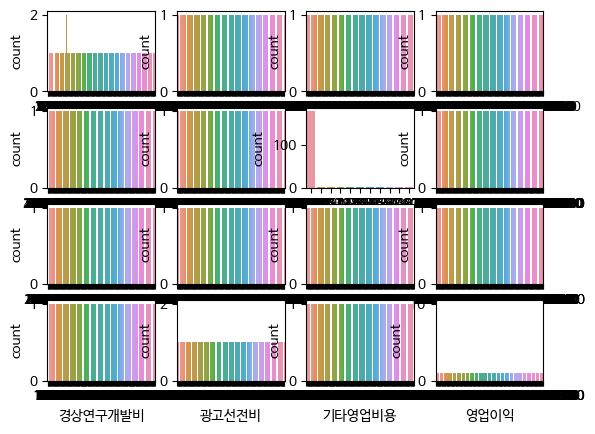

In [ ]:
plt.subplot(4, 4, 1)
sns.countplot(data = data, x = "사업체수")

plt.subplot(4, 4, 2)
sns.countplot(data = data, x = "종사자수")

plt.subplot(4, 4, 3)
sns.countplot(data = data, x = "남")

plt.subplot(4, 4, 4)
sns.countplot(data = data, x = "여")

plt.subplot(4, 4, 5)
sns.countplot(data = data, x = "매출액")

plt.subplot(4, 4, 6)
sns.countplot(data = data, x = "영업비용")

plt.subplot(4, 4, 7)
sns.countplot(data = data, x = "매출원가")

plt.subplot(4, 4, 8)
sns.countplot(data = data, x = "인건비")

plt.subplot(4, 4, 9)
sns.countplot(data = data, x = "급여총액")

plt.subplot(4, 4, 10)
sns.countplot(data = data, x = "임차료")

plt.subplot(4, 4, 11)
sns.countplot(data = data, x = "세금과공과")

plt.subplot(4, 4, 12)
sns.countplot(data = data, x = "감가-대손상각비")

plt.subplot(4, 4, 13)
sns.countplot(data = data, x = "경상연구개발비")

plt.subplot(4, 4, 14)
sns.countplot(data = data, x = "광고선전비")

plt.subplot(4, 4, 15)
sns.countplot(data = data, x = "기타영업비용")

plt.subplot(4, 4, 16)
sns.countplot(data = data, x = "영업이익")

plt.show()

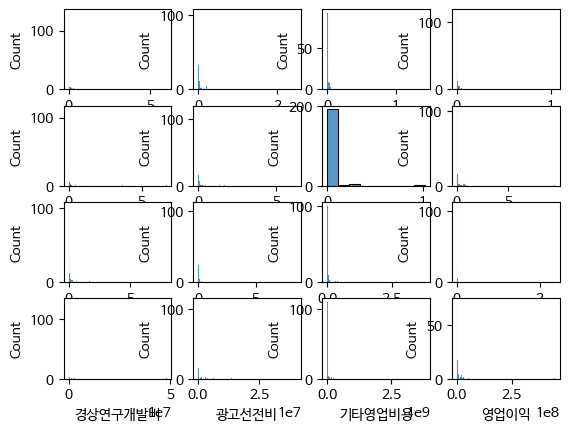

In [ ]:
plt.subplot(4, 4, 1)
sns.histplot(data = data, x = "사업체수")

plt.subplot(4, 4, 2)
sns.histplot(data = data, x = "종사자수")

plt.subplot(4, 4, 3)
sns.histplot(data = data, x = "남")

plt.subplot(4, 4, 4)
sns.histplot(data = data, x = "여")

plt.subplot(4, 4, 5)
sns.histplot(data = data, x = "매출액")

plt.subplot(4, 4, 6)
sns.histplot(data = data, x = "영업비용")

plt.subplot(4, 4, 7)
sns.histplot(data = data, x = "매출원가")

plt.subplot(4, 4, 8)
sns.histplot(data = data, x = "인건비")

plt.subplot(4, 4, 9)
sns.histplot(data = data, x = "급여총액")

plt.subplot(4, 4, 10)
sns.histplot(data = data, x = "임차료")

plt.subplot(4, 4, 11)
sns.histplot(data = data, x = "세금과공과")

plt.subplot(4, 4, 12)
sns.histplot(data = data, x = "감가-대손상각비")

plt.subplot(4, 4, 13)
sns.histplot(data = data, x = "경상연구개발비")

plt.subplot(4, 4, 14)
sns.histplot(data = data, x = "광고선전비")

plt.subplot(4, 4, 15)
sns.histplot(data = data, x = "기타영업비용")

plt.subplot(4, 4, 16)
sns.histplot(data = data, x = "영업이익")

plt.show()

In [ ]:
data.describe()

사업체수          종사자수             남             여           매출액  \
count  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
mean   1.206404e+05  4.962690e+05  2.874472e+05  2.088218e+05  1.342184e+08   
std    4.977952e+05  1.901919e+06  1.110851e+06  8.060026e+05  5.795153e+08   
min    1.300000e+01  1.390000e+02  7.500000e+01  3.900000e+01  6.810000e+02   
25%    8.222500e+02  2.252350e+04  1.153525e+04  8.206250e+03  2.727930e+06   
50%    6.408500e+03  9.360000e+04  5.284100e+04  3.372650e+04  1.219102e+07   
75%    6.311875e+04  3.132805e+05  1.521302e+05  1.238712e+05  4.555522e+07   
max    6.032022e+06  2.481345e+07  1.437236e+07  1.044109e+07  6.710919e+09   

               영업비용          매출원가           인건비          급여총액           임차료  \
count  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
mean   1.252978e+08  2.052082e+07  1.897026e+07  1.600030e+07  1.702291e+06   
std    5.405655e+08  1.107955e+08  7.564988e+07  6.354301e+07  6.632564e+06   
min    6.810000e+02  0.000000e+00  6.270000e+02  6.050000e+02  1.500000e+01   
25%    2.723185e+06  0.000000e+00  5.831920e+05  4.956698e+05  5.892125e+04   
50%    1.105394e+07  0.000000e+00  2.726892e+06  2.427136e+06  2.482280e+05   
75%    4.316933e+07  0.000000e+00  9.852220e+06  8.725905e+06  8.956200e+05   
max    6.264889e+09  1.026041e+09  9.485130e+08  8.000148e+08  8.511456e+07   

              세금과공과      감가-대손상각비       경상연구개발비         광고선전비        기타영업비용  \
count  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
mean   7.616459e+05  4.724995e+06  9.616711e+05  8.033986e+05  7.685271e+07   
std    3.024219e+06  2.131549e+07  4.938226e+06  3.434523e+06  3.515419e+08   
min    5.000000e+00  1.700000e+01  0.000000e+00  3.000000e+00  7.000000e+00   
25%    3.038825e+04  1.326882e+05  3.106500e+03  1.695200e+04  1.547476e+06   
50%    1.232235e+05  4.331610e+05  2.132500e+04  6.709650e+04  5.472762e+06   
75%    3.891835e+05  1.483052e+06  1.732325e+05  2.821242e+05  2.164648e+07   
max    3.808230e+07  2.362498e+08  4.808356e+07  4.016993e+07  3.842635e+09   

               영업이익  
count  2.000000e+02  
mean   8.920591e+06  
std    3.909539e+07  
min   -1.092148e+06  
25%    5.463125e+04  
50%    5.198380e+05  
75%    3.671540e+06  
max    4.460296e+08

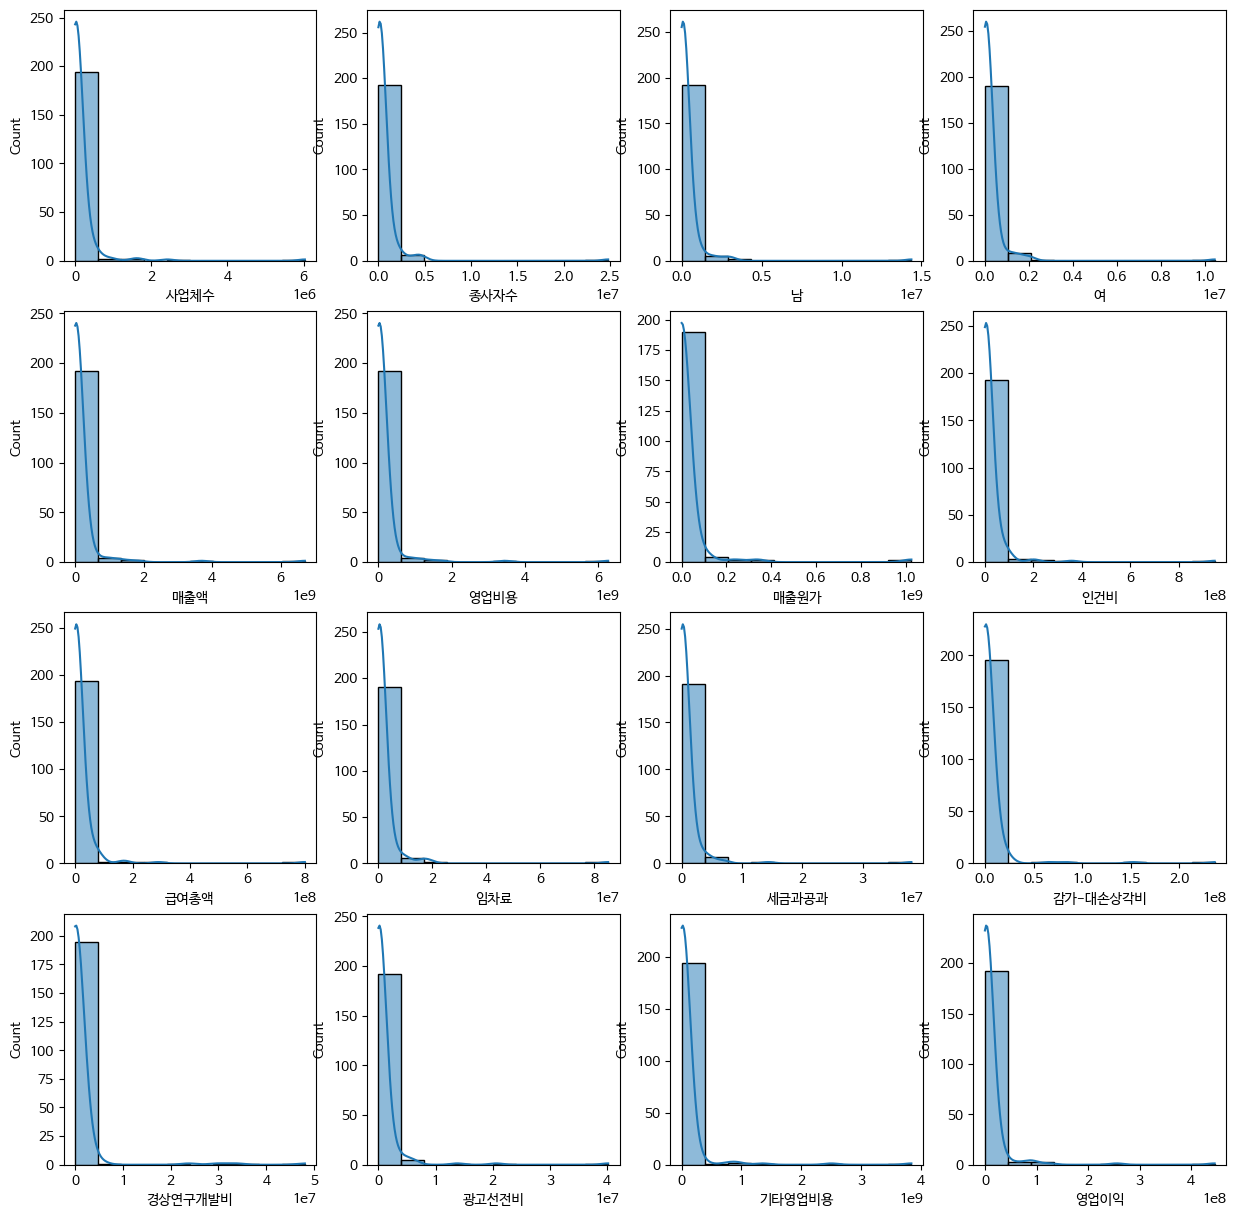

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(4, 4, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      );

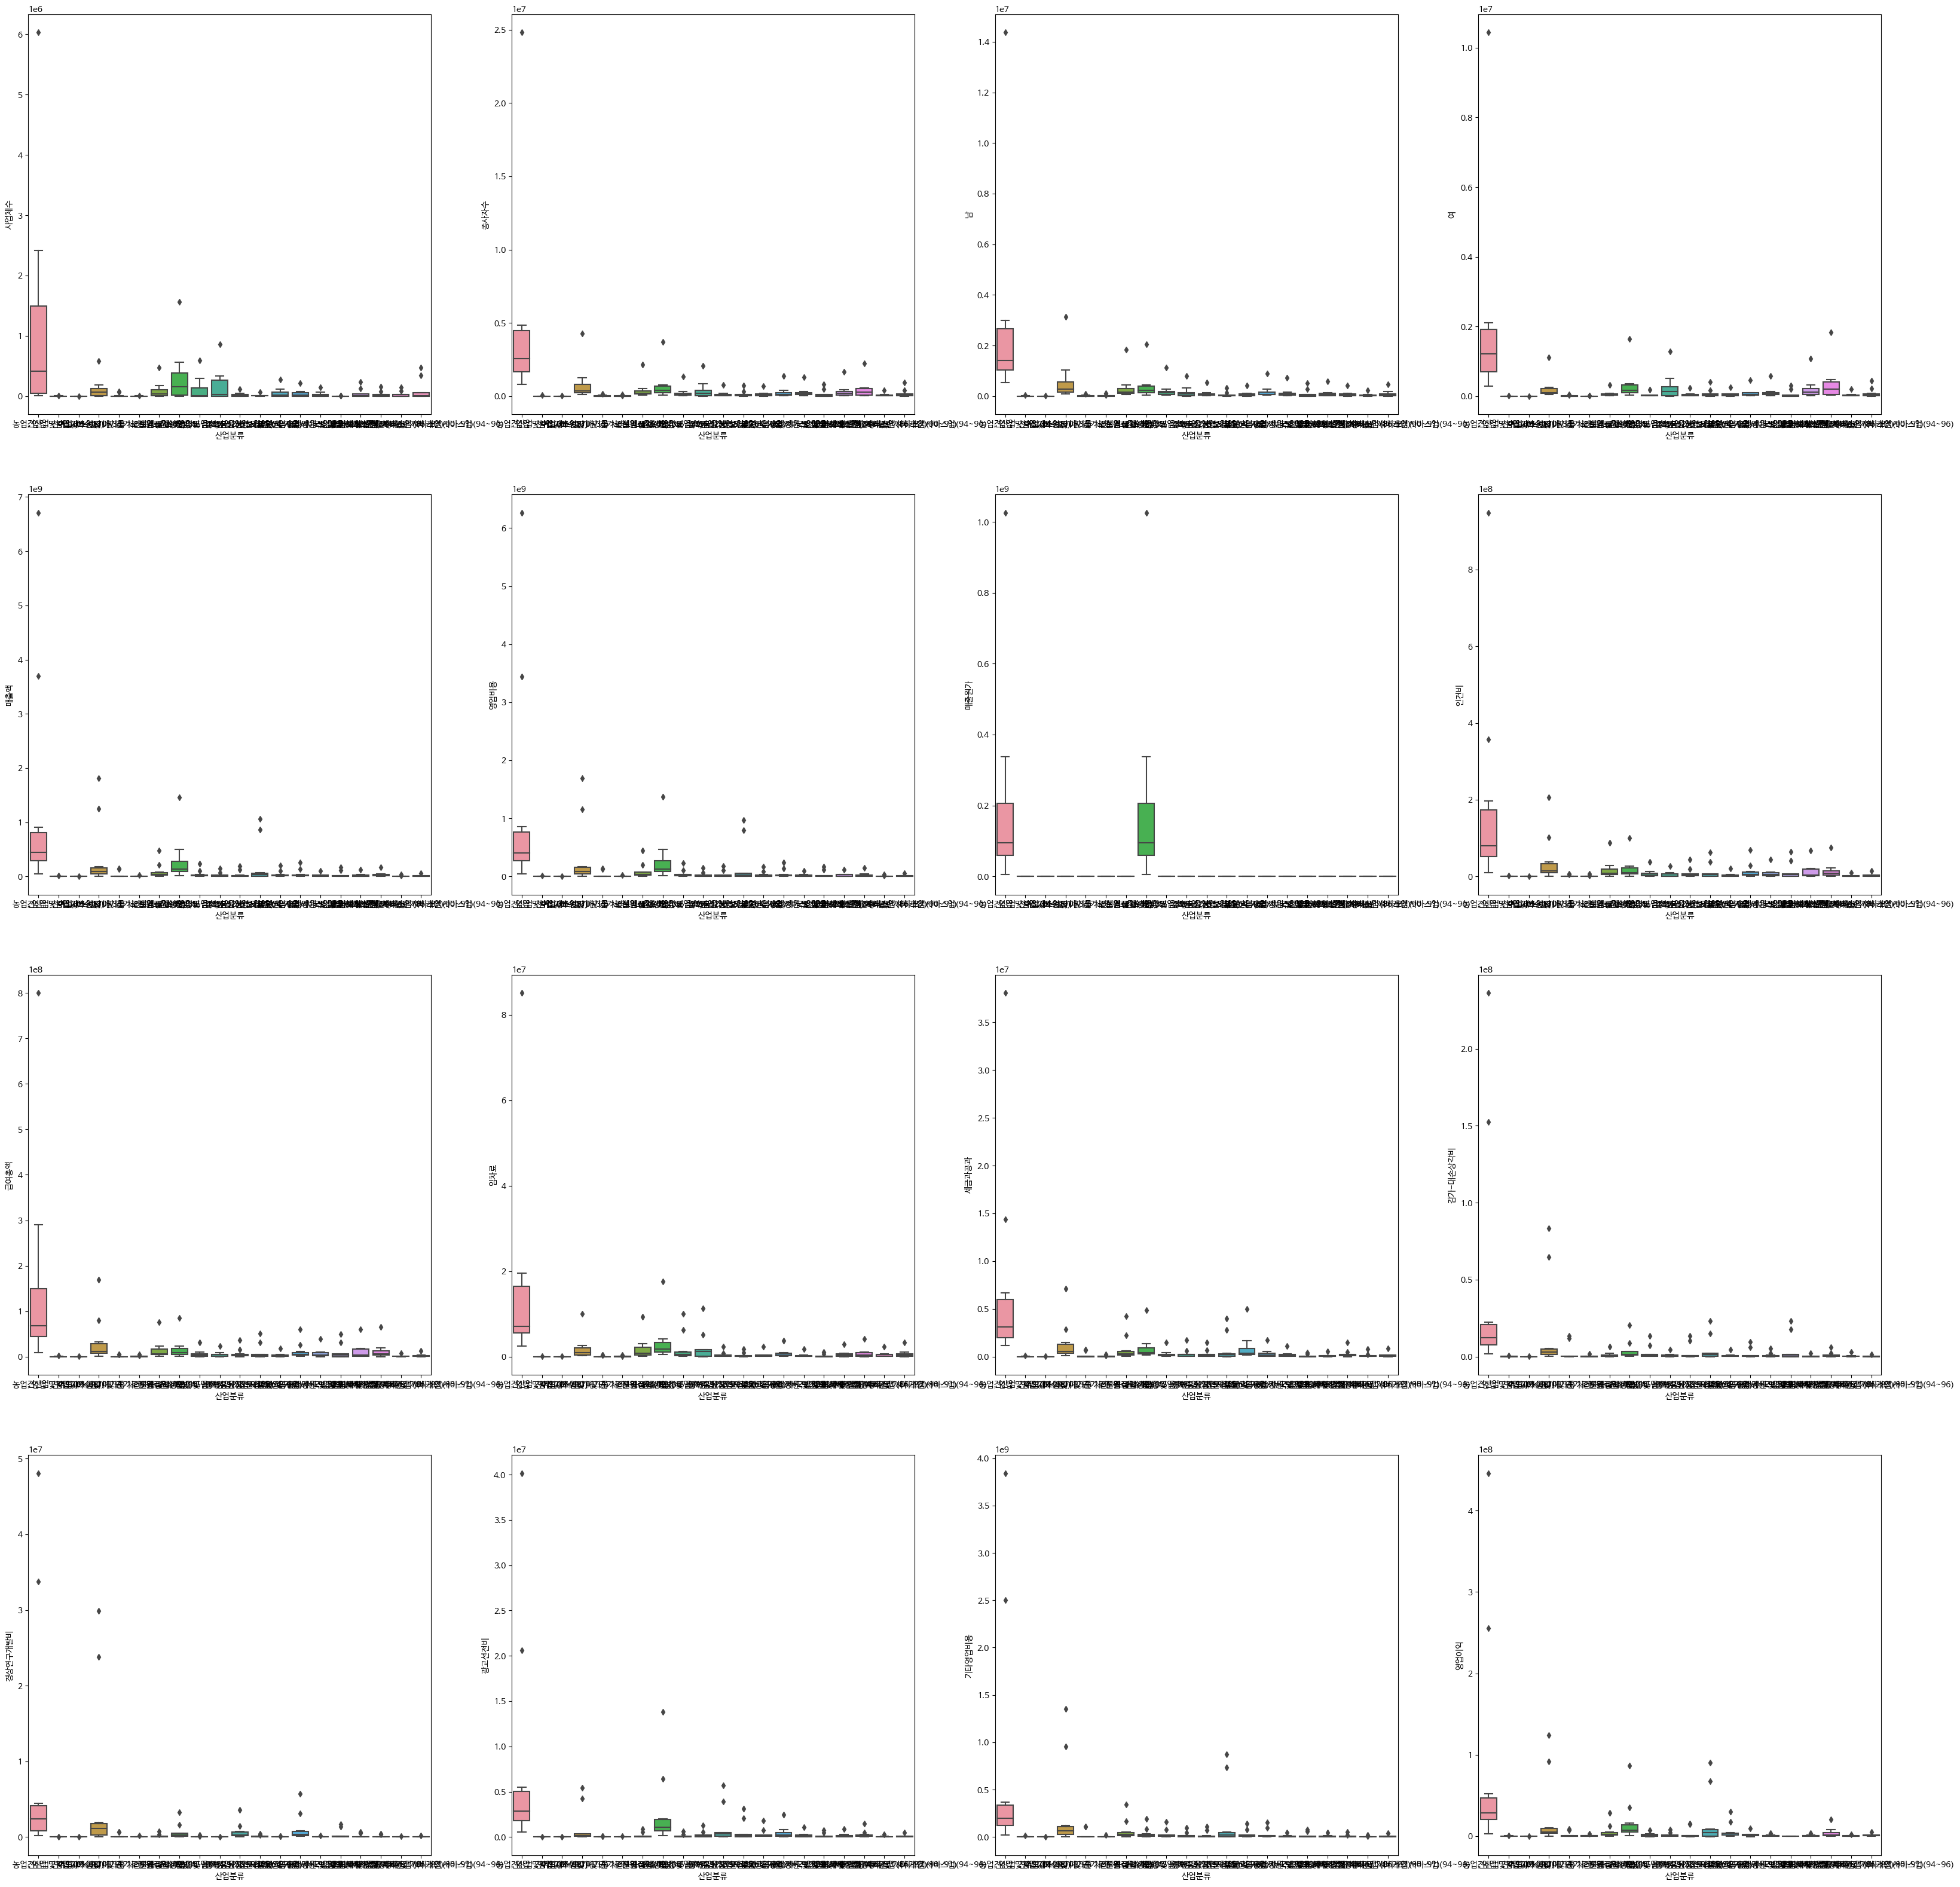

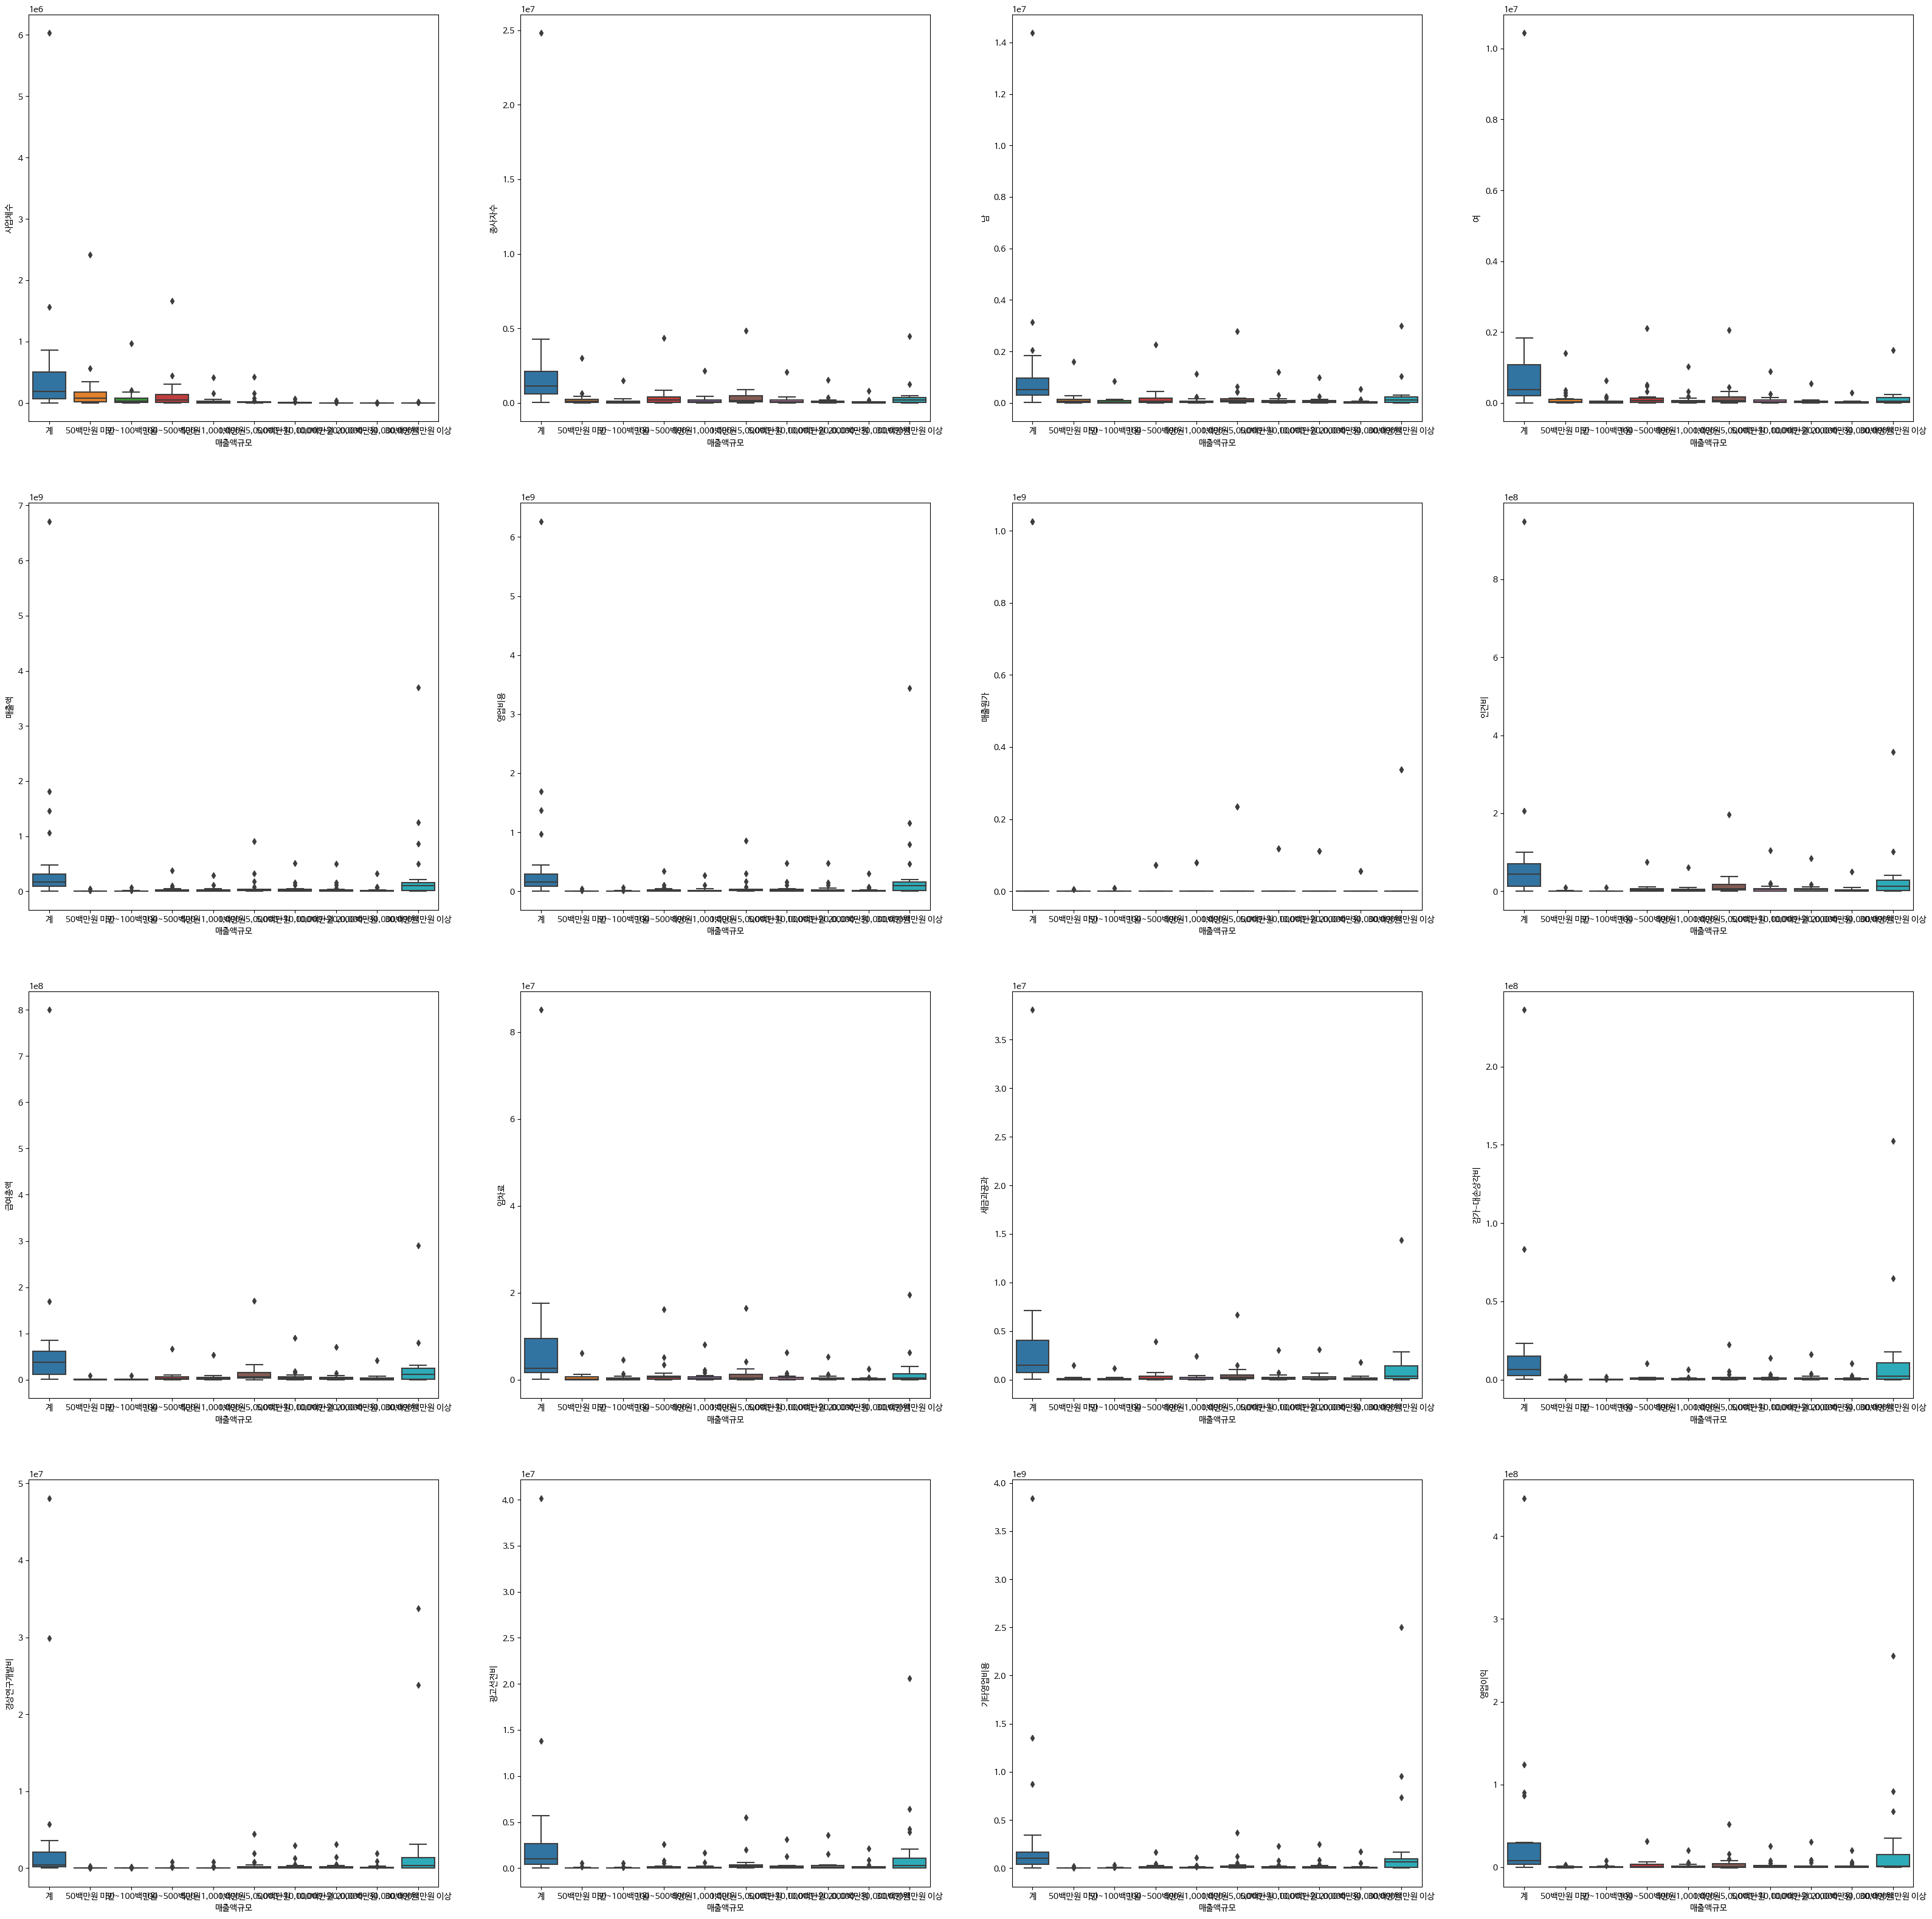

In [ ]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "산업분류", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "매출액규모", y = num_columns[i])

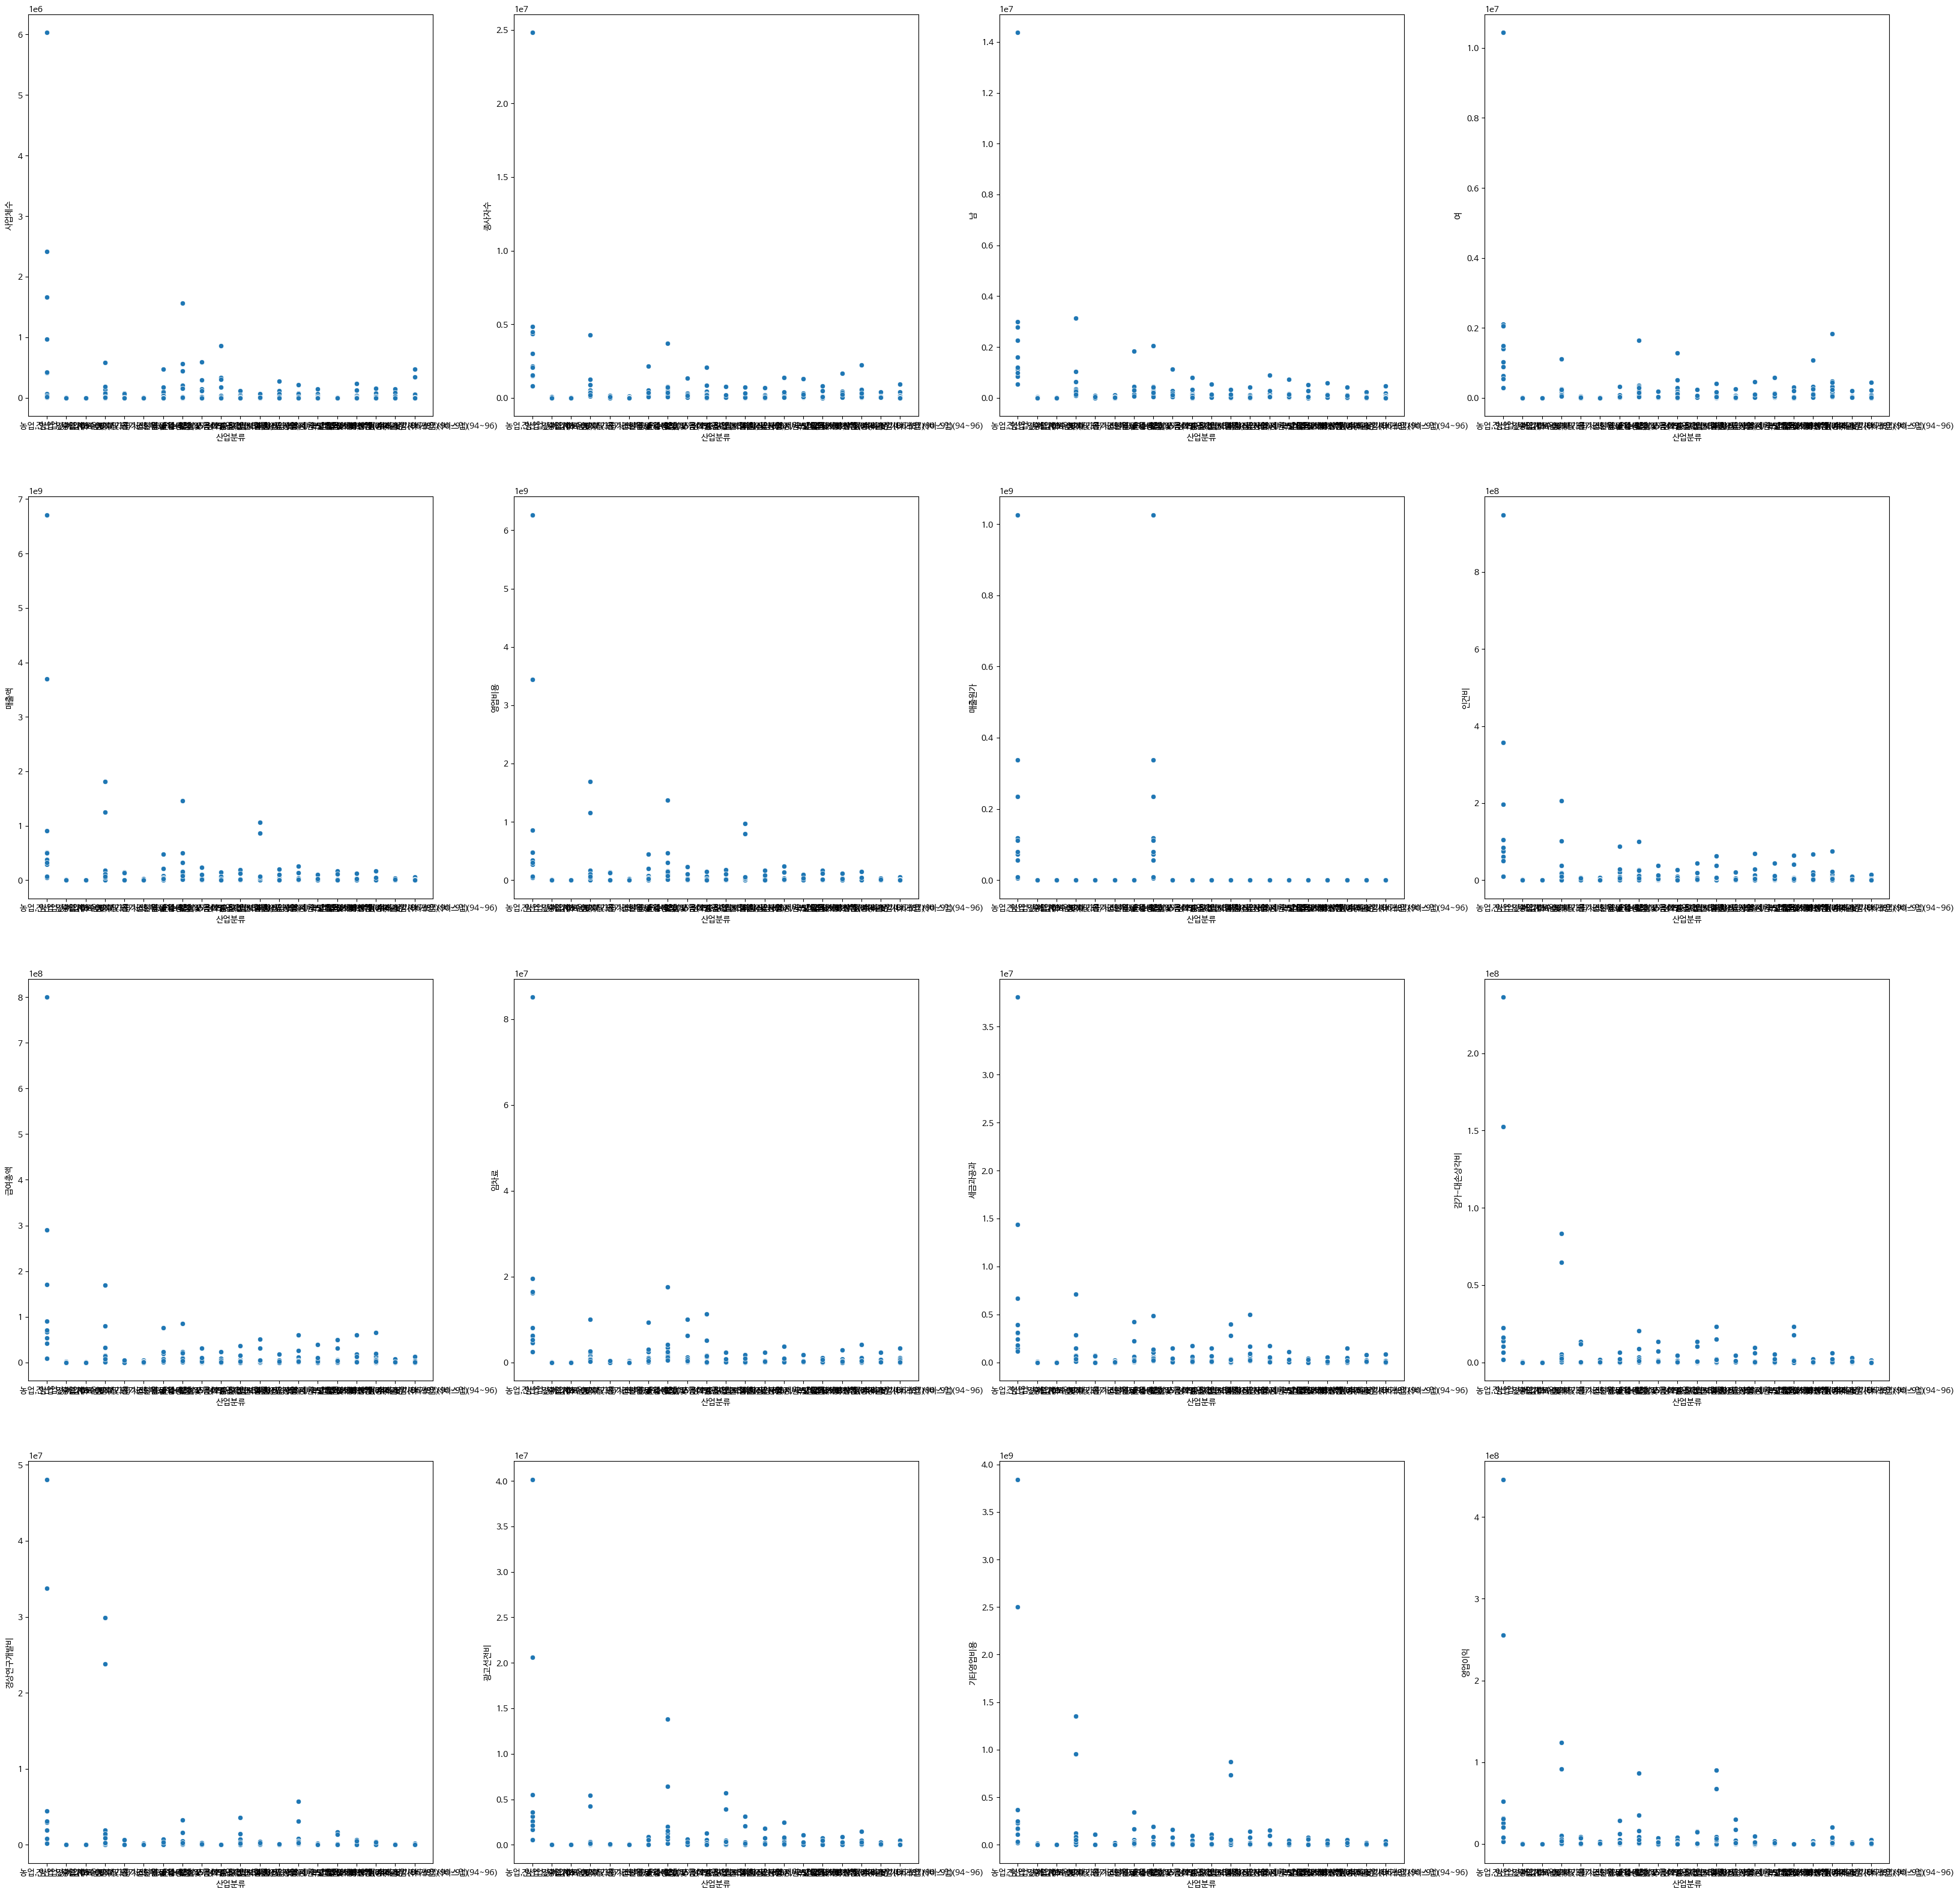

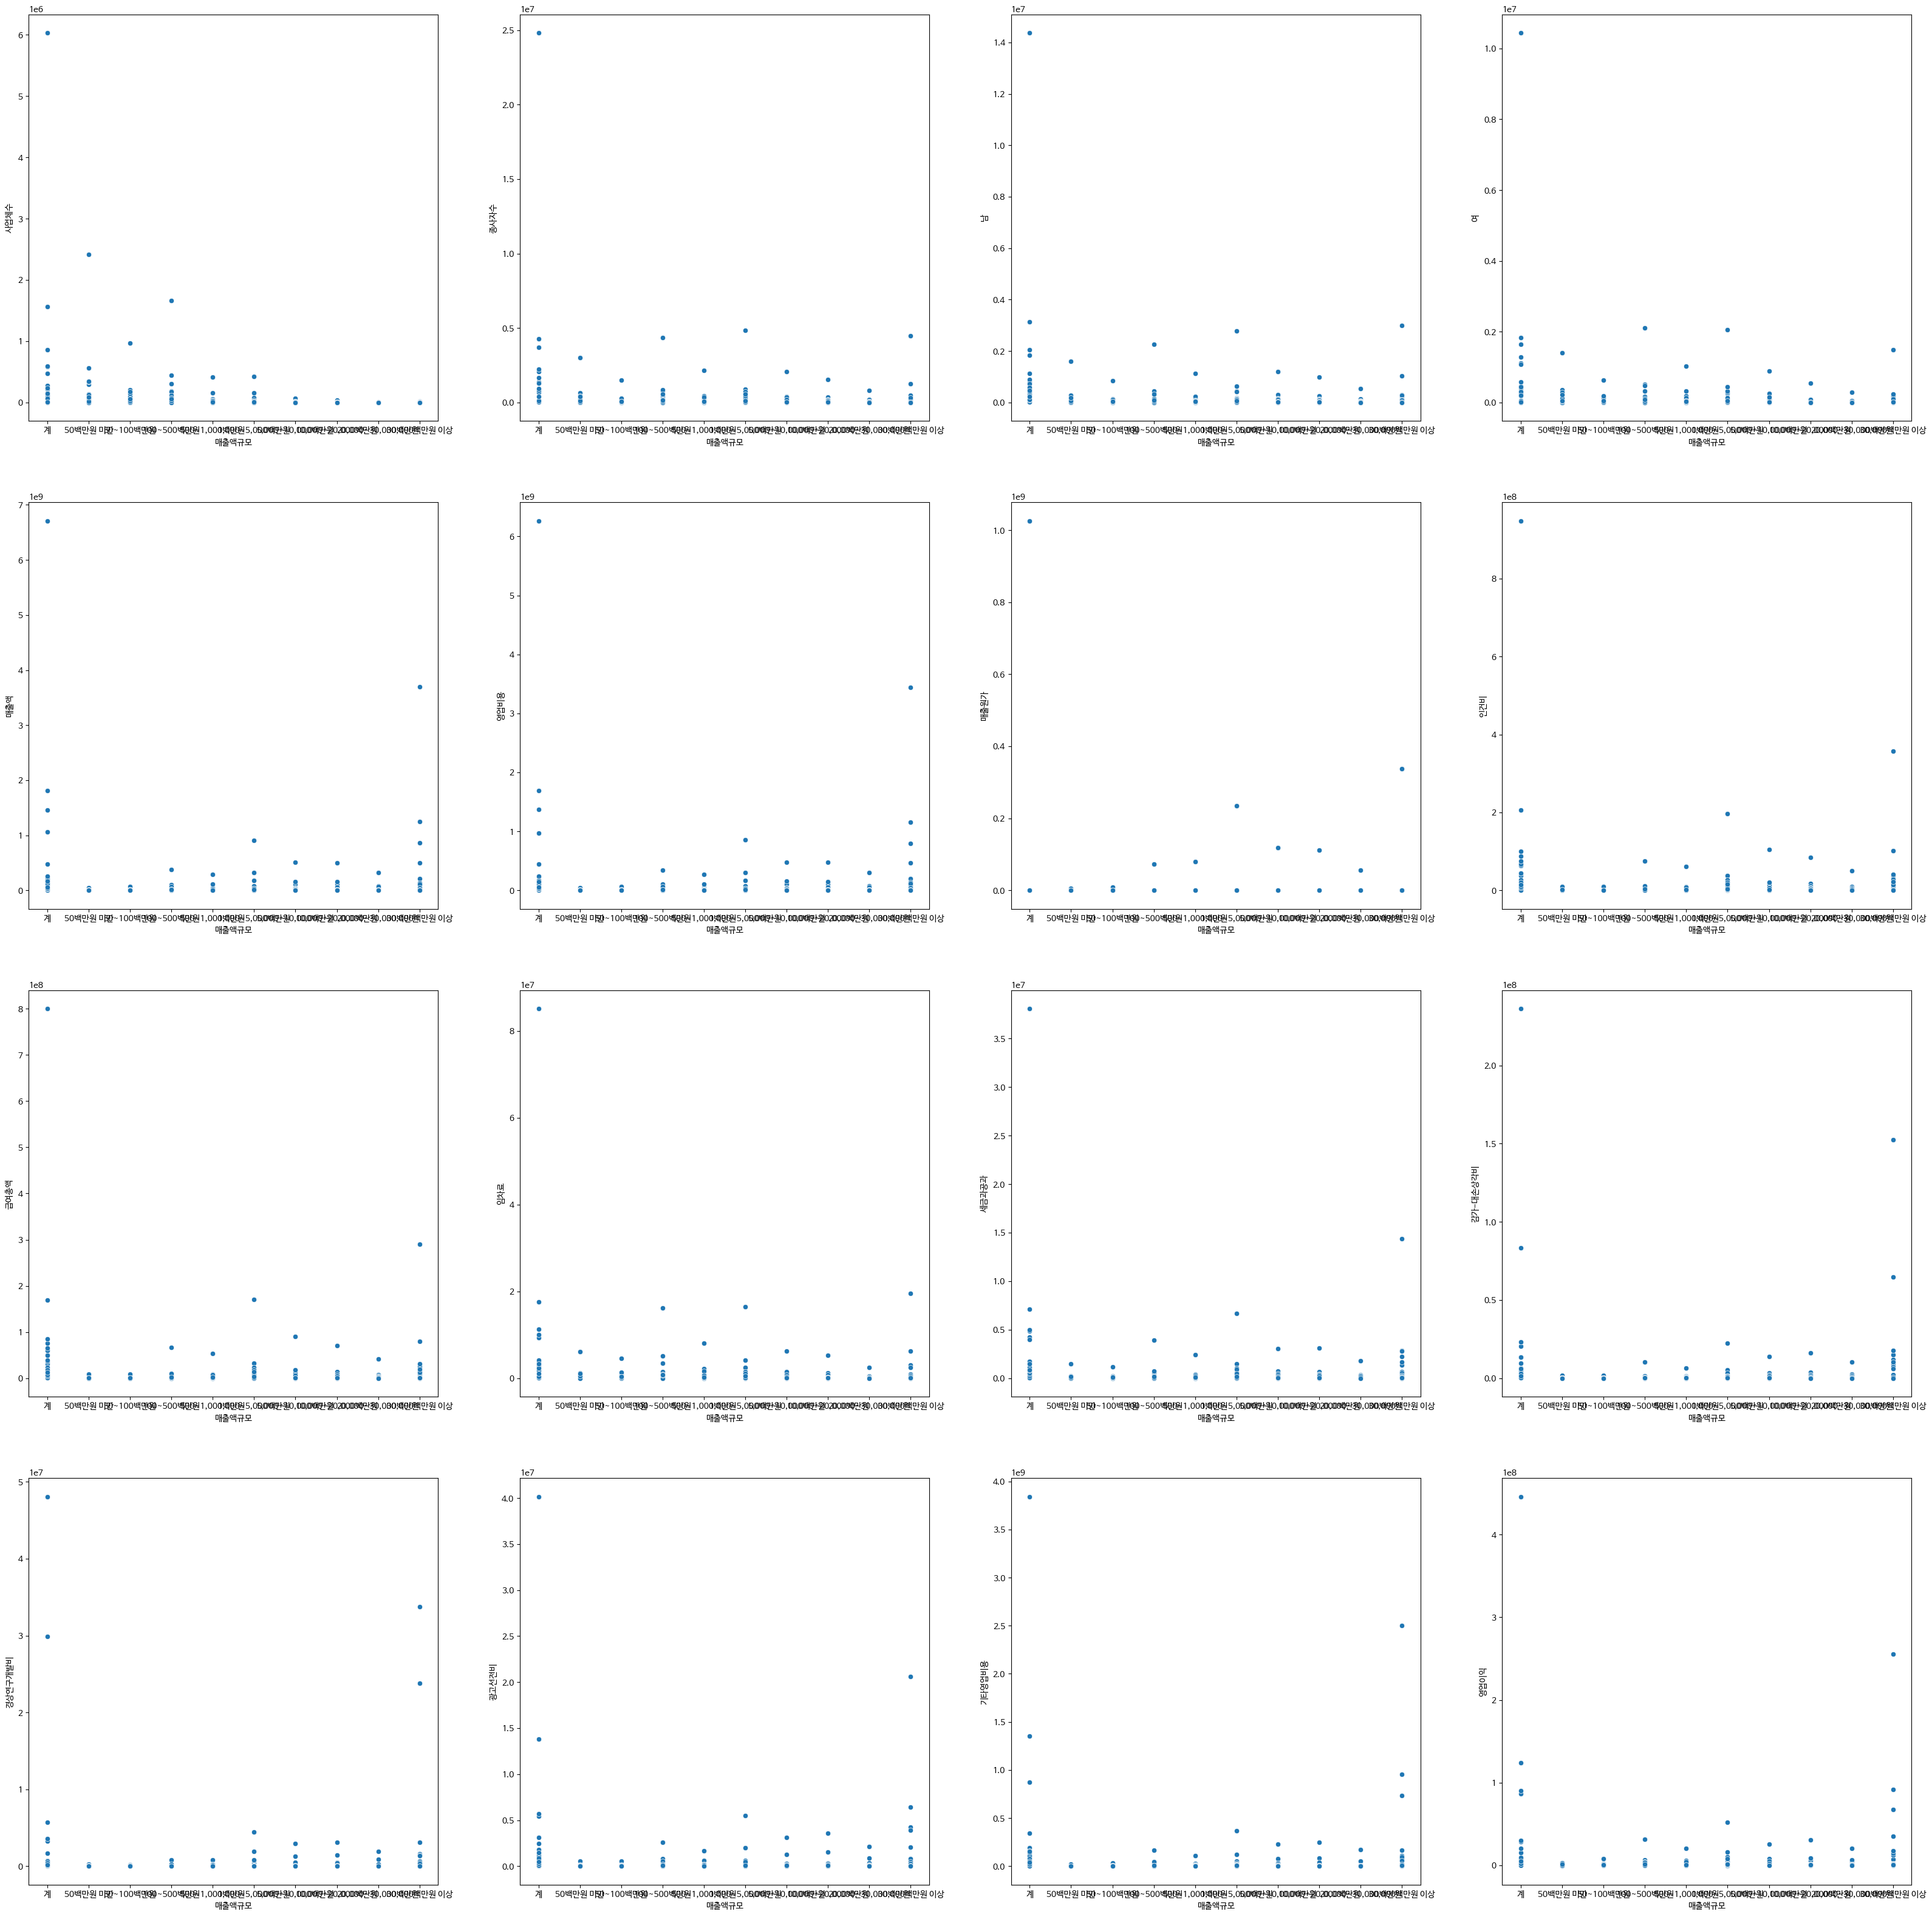

In [ ]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "산업분류", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "매출액규모", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect co

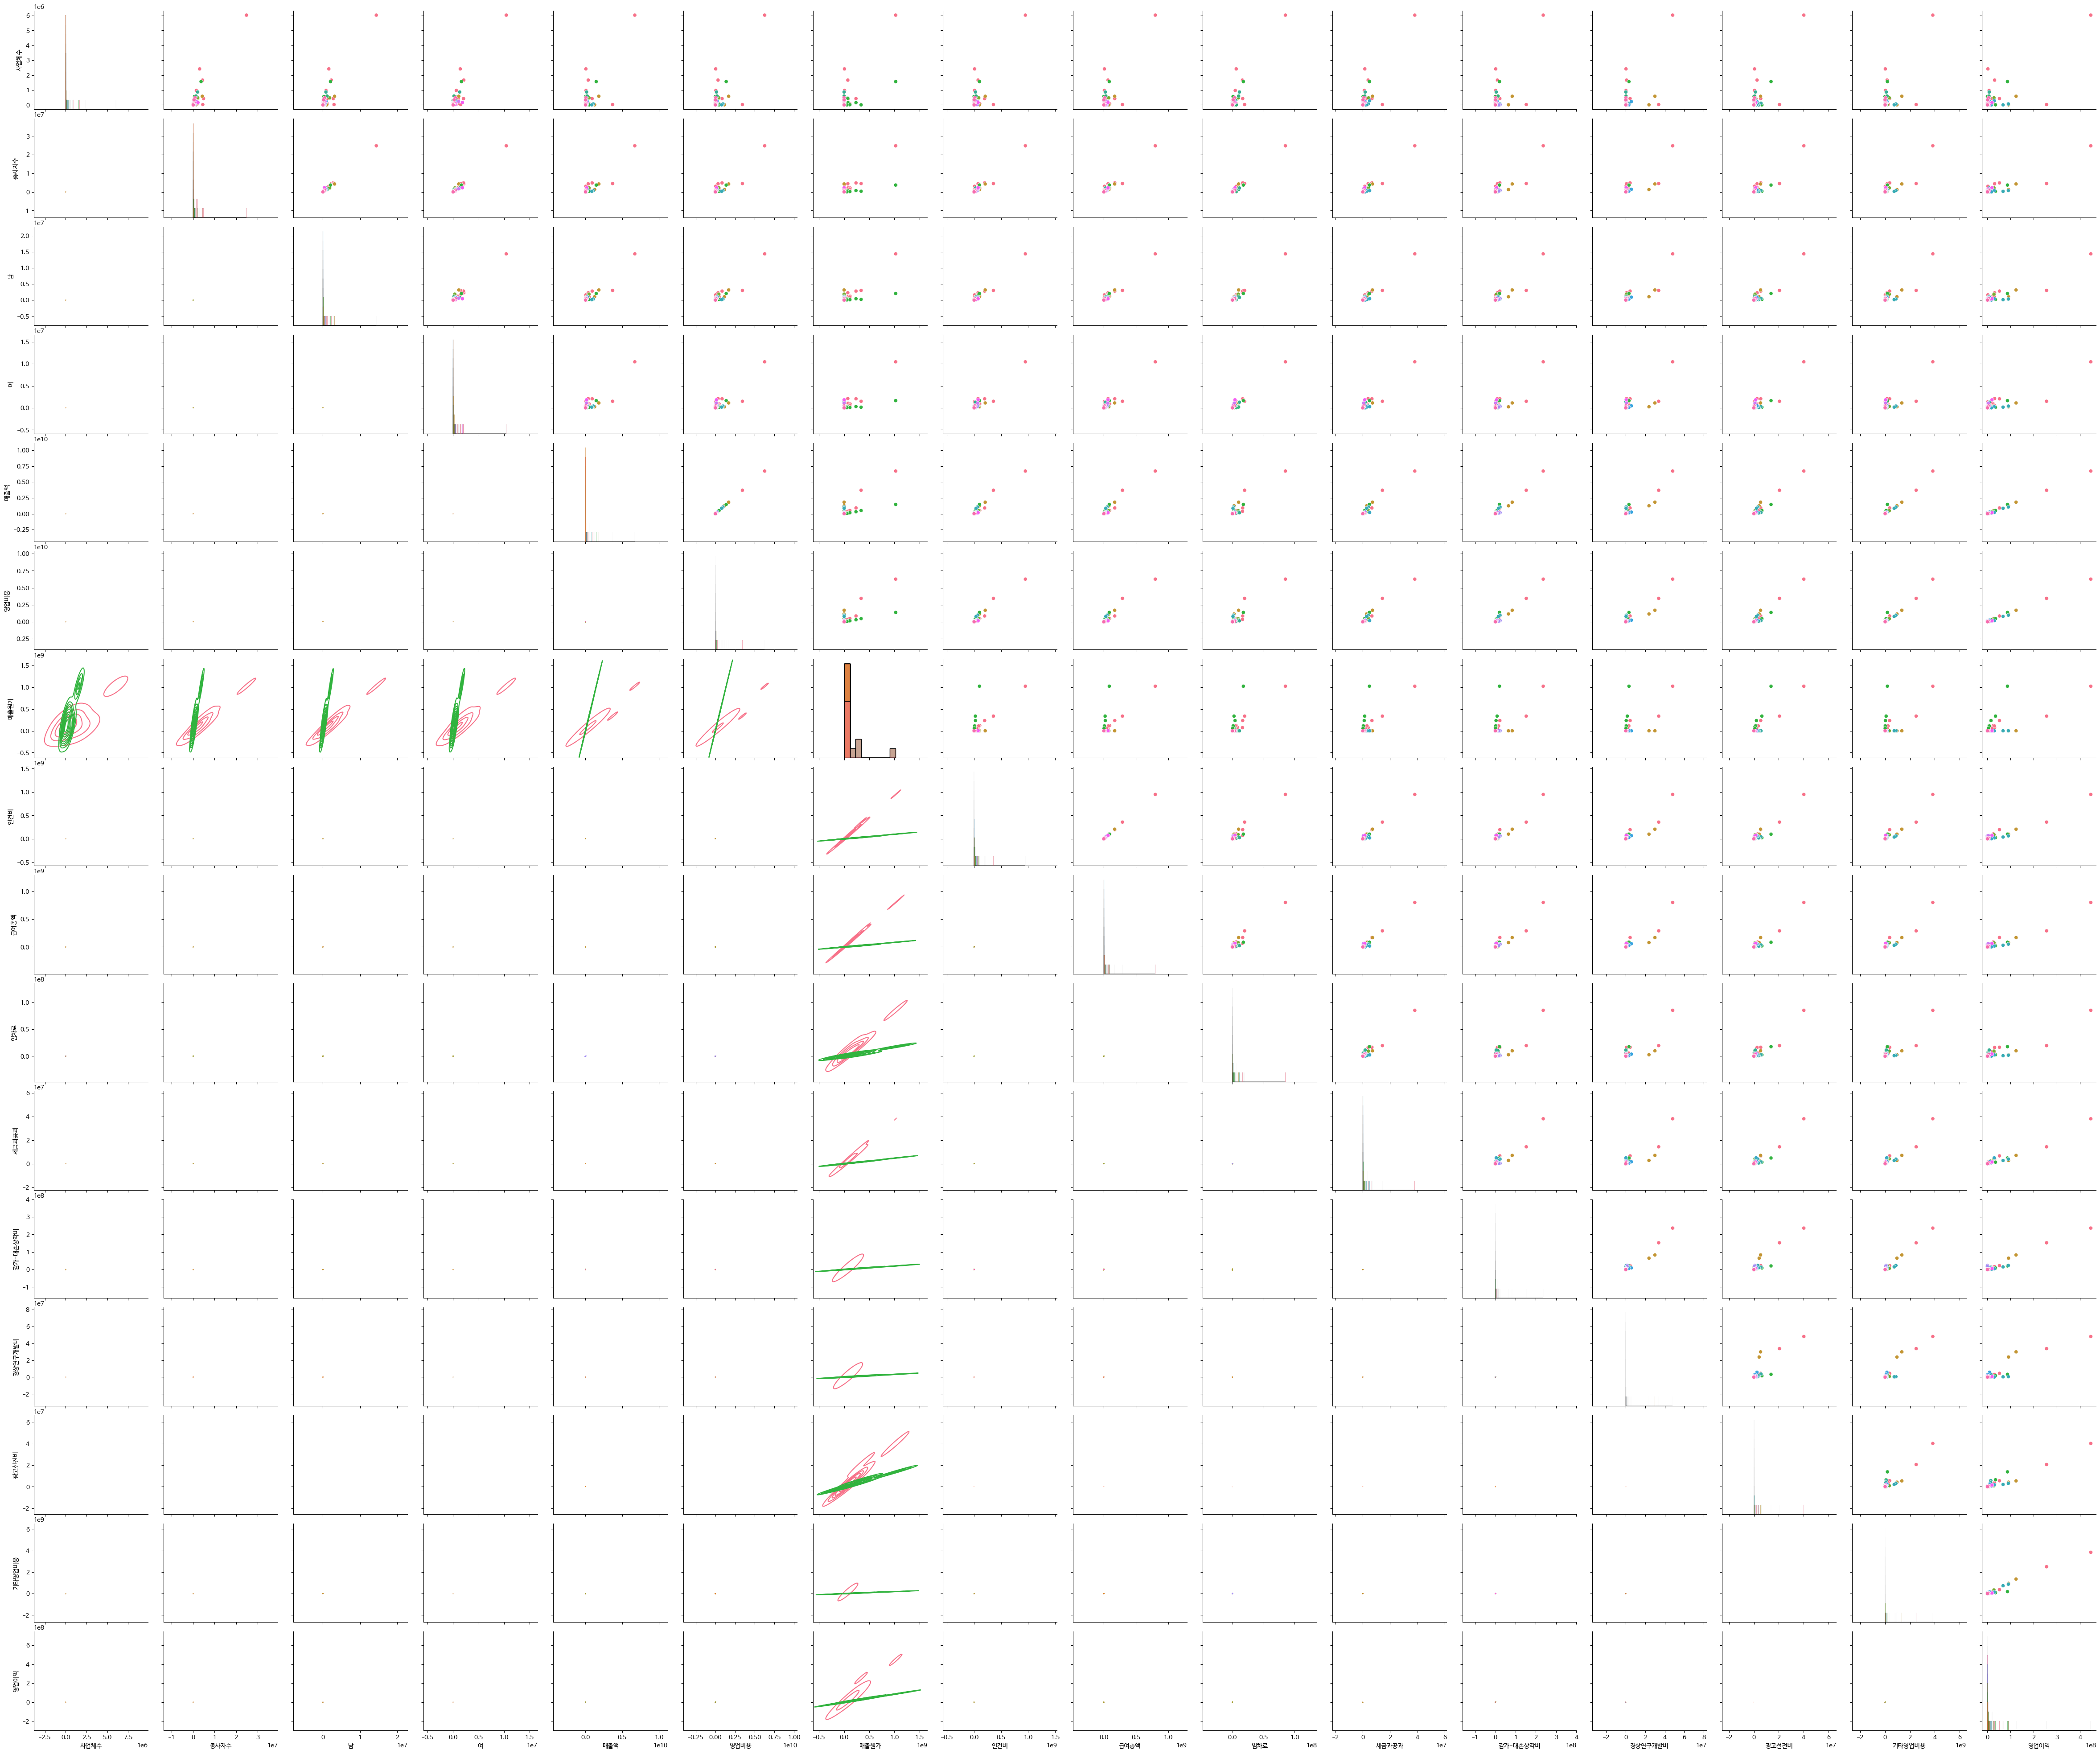

In [ ]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "산업분류")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

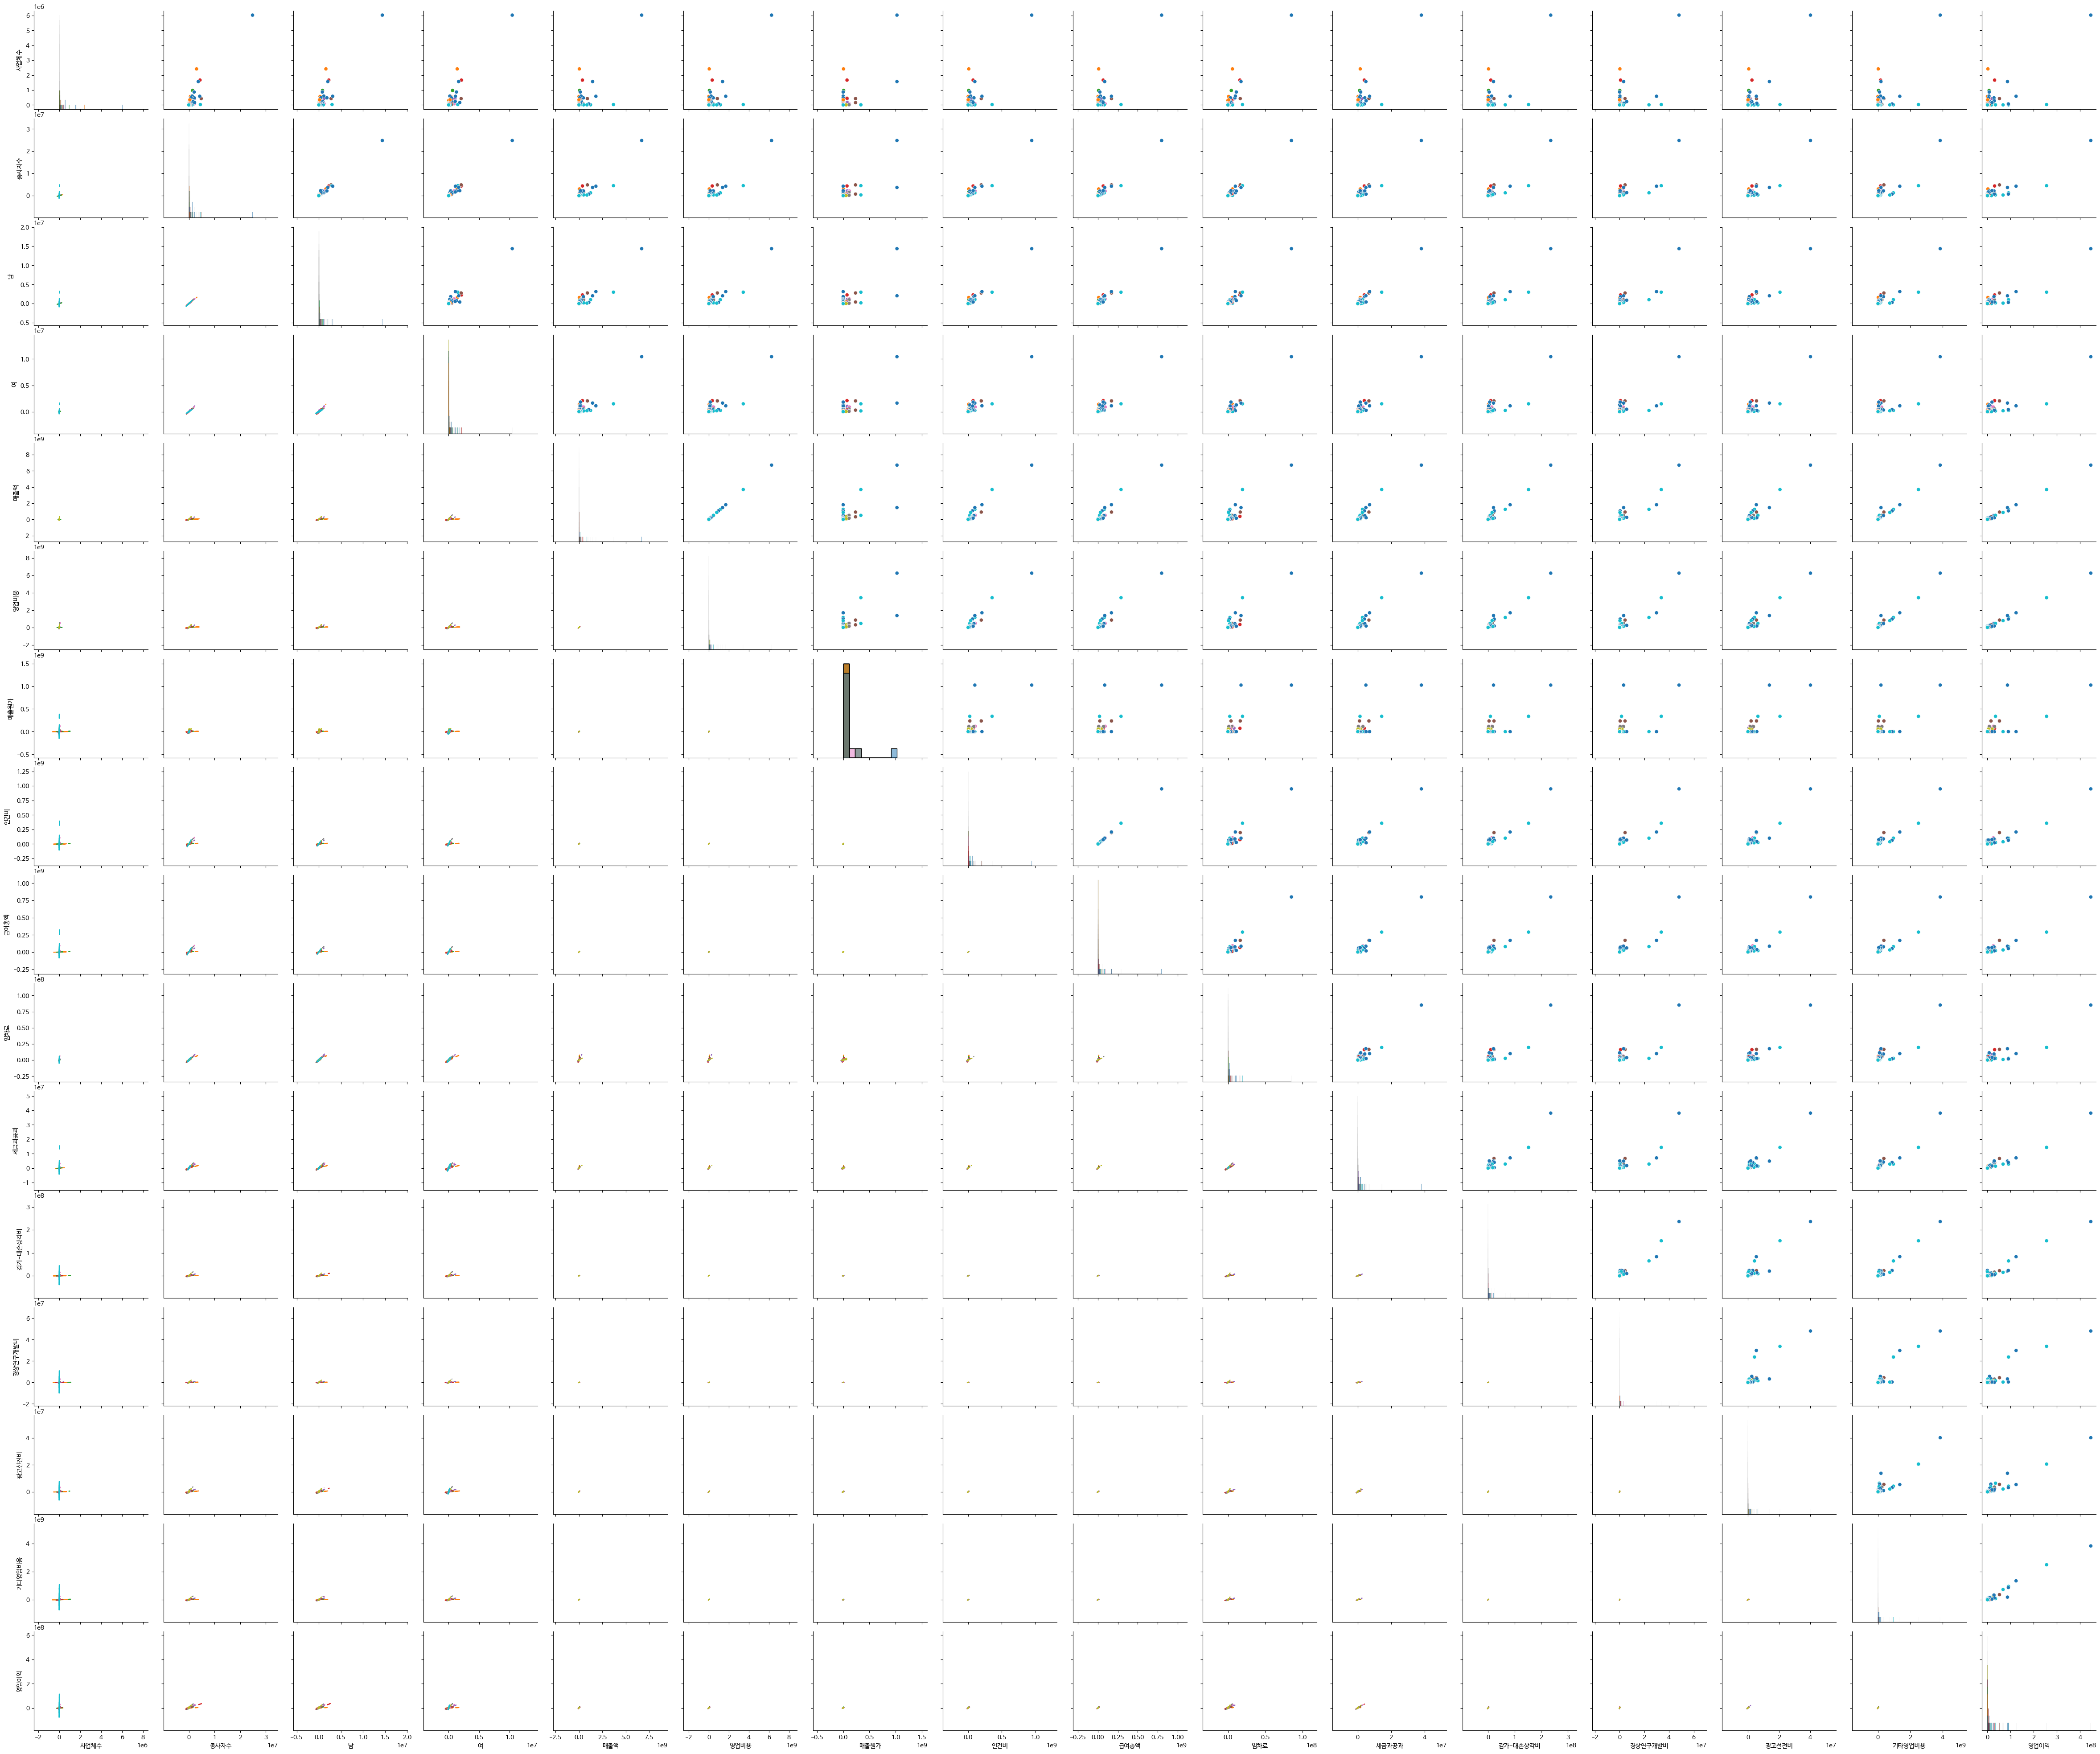

In [ ]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "매출액규모")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

In [ ]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

In [ ]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

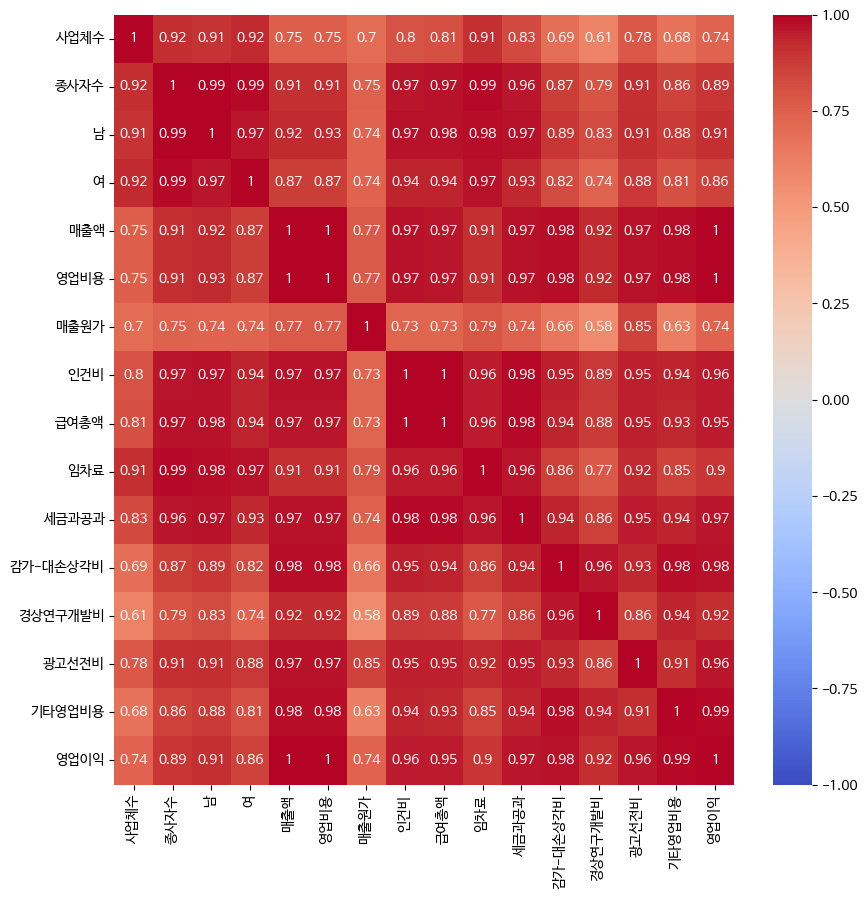

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

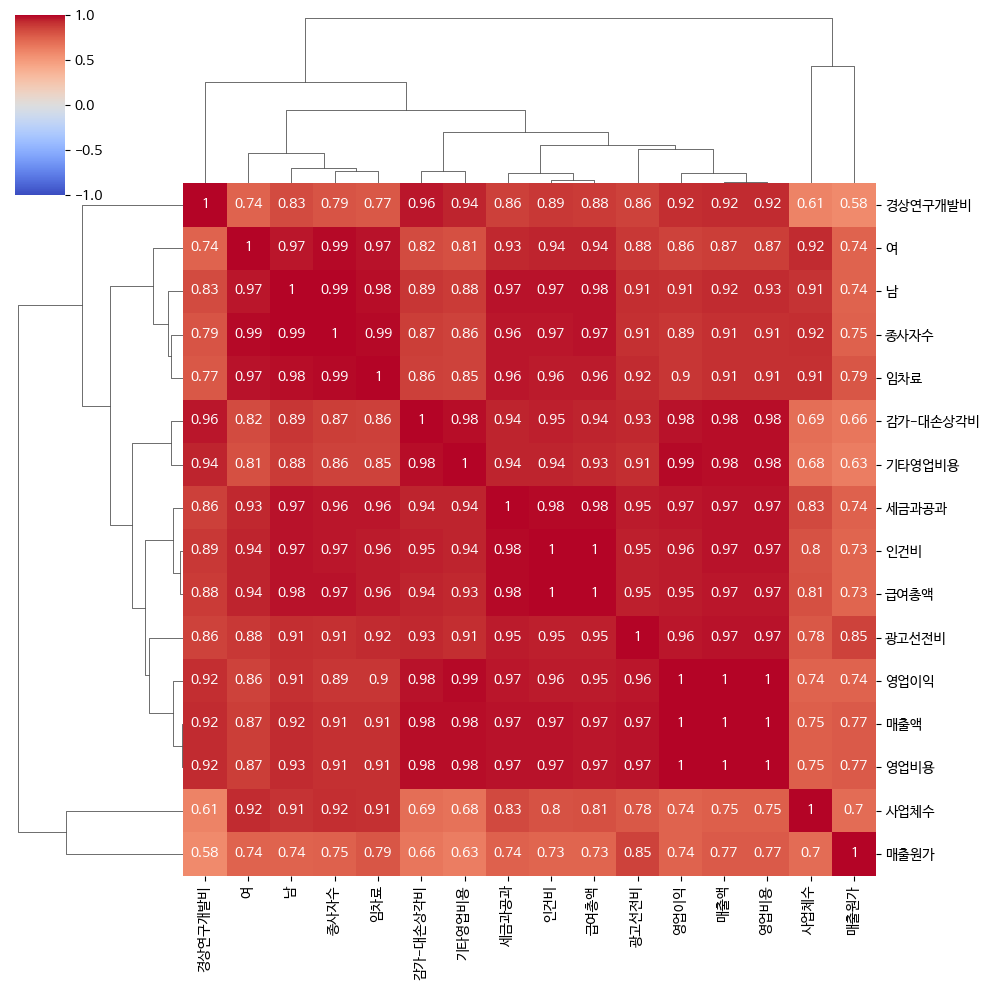

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")